# Analyse Exploratoire du fichier myreport_espace_disque_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [8]:
tab = pd.read_csv('../data/logServer/myreport_espace_disque_full.csv',sep=',')

### Le fichier myreport_espace_disque_full.csv : taille, colonnes

In [11]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  8017  lignes et  16  colonnes dans le data frame


In [13]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Somme', 'Somme(RAW)',
       'Octets libres C:', 'Octets libres C:(RAW)', 'Espace disponible C:',
       'Espace disponible C:(RAW)', 'Octets libres D:',
       'Octets libres D:(RAW)', 'Espace disponible D:',
       'Espace disponible D:(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [15]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8017 entries, 0 to 8016
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date et heure              8017 non-null   object 
 1   Date et heure(RAW)         8016 non-null   float64
 2   Somme                      2194 non-null   object 
 3   Somme(RAW)                 2193 non-null   float64
 4   Octets libres C:           2194 non-null   object 
 5   Octets libres C:(RAW)      2193 non-null   float64
 6   Espace disponible C:       2194 non-null   object 
 7   Espace disponible C:(RAW)  2193 non-null   float64
 8   Octets libres D:           2194 non-null   object 
 9   Octets libres D:(RAW)      2193 non-null   float64
 10  Espace disponible D:       2194 non-null   object 
 11  Espace disponible D:(RAW)  2193 non-null   float64
 12  Temps mort                 2194 non-null   object 
 13  Temps mort(RAW)            2193 non-null   float

In [18]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                8017
Date et heure(RAW)           8016
Somme                          33
Somme(RAW)                   2193
Octets libres C:                6
Octets libres C:(RAW)        2192
Espace disponible C:            9
Espace disponible C:(RAW)      48
Octets libres D:               28
Octets libres D:(RAW)        2185
Espace disponible D:            5
Espace disponible D:(RAW)      14
Temps mort                      1
Temps mort(RAW)                 1
Couverture                      3
Couverture(RAW)                 2
dtype: int64


In [21]:
tab.head(50)


,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Octets libres C:,Octets libres C:(RAW),Espace disponible C:,Espace disponible C:(RAW),Octets libres D:,Octets libres D:(RAW),Espace disponible D:,Espace disponible D:(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,12/01/2024 00:00:00 - 01:00:00,45303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,12/01/2024 01:00:00 - 02:00:00,45303.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,12/01/2024 02:00:00 - 03:00:00,45303.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
3,12/01/2024 03:00:00 - 04:00:00,45303.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
4,12/01/2024 04:00:00 - 05:00:00,45303.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
5,12/01/2024 05:00:00 - 06:00:00,45303.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
6,12/01/2024 06:00:00 - 07:00:00,45303.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
7,12/01/2024 07:00:00 - 08:00:00,45303.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
8,12/01/2024 08:00:00 - 09:00:00,45303.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
9,12/01/2024 09:00:00 - 10:00:00,45303.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0


### Suppression des valeurs NaN

In [26]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 5824


### Transformation des dates

In [29]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [31]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [33]:
tab.head()

,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Octets libres C:,Octets libres C:(RAW),Espace disponible C:,Espace disponible C:(RAW),Octets libres D:,Octets libres D:(RAW),Espace disponible D:,Espace disponible D:(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW),date_full,date,heure
5137,13/08/2024 02:00:00 - 03:00:00,45517.041667,147 Go,1.573318e+11,16 Go,1.755541e+10,28 %,27.6667,130 Go,1.397763e+11,13 %,13.0,0 %,0.0,100 %,10000.0,2024-08-13 01:00:00,2024-08-13,01
5138,13/08/2024 03:00:00 - 04:00:00,45517.083333,147 Go,1.573134e+11,16 Go,1.753744e+10,27 %,27.0000,130 Go,1.397759e+11,13 %,13.0,0 %,0.0,100 %,10000.0,2024-08-13 02:00:00,2024-08-13,02
5139,13/08/2024 04:00:00 - 05:00:00,45517.125000,146 Go,1.572935e+11,16 Go,1.751801e+10,27 %,27.0000,130 Go,1.397754e+11,13 %,13.0,0 %,0.0,100 %,10000.0,2024-08-13 03:00:00,2024-08-13,03
5140,13/08/2024 05:00:00 - 06:00:00,45517.166667,146 Go,1.572732e+11,16 Go,1.749850e+10,27 %,27.0000,130 Go,1.397747e+11,13 %,13.0,0 %,0.0,100 %,10000.0,2024-08-13 04:00:00,2024-08-13,04
5141,13/08/2024 06:00:00 - 07:00:00,45517.208333,146 Go,1.572533e+11,16 Go,1.747899e+10,27 %,27.0000,130 Go,1.397743e+11,13 %,13.0,0 %,0.0,100 %,10000.0,2024-08-13 05:00:00,2024-08-13,05


### Réagencement et Suppression des colonnes

In [36]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [38]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Somme"])
tab = tab.drop(columns=["Octets libres C:"])
tab = tab.drop(columns=["Espace disponible C:"])
tab = tab.drop(columns=["Octets libres D:"])
tab = tab.drop(columns=["Espace disponible D:"])

tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

# renommage des colonnes
tab.rename(columns={"Somme(RAW)": "Somme(Go)"}, inplace=True)
tab.rename(columns={"Octets libres C:(RAW)": "Octets libres C:(octets)"}, inplace=True)
tab.rename(columns={"Espace disponible C:(RAW)": "Espace disponible C:(%)"}, inplace=True)
tab.rename(columns={"Octets libres D:(RAW)": "Octets libres D:(octets)"}, inplace=True)
tab.rename(columns={"Espace disponible D:(RAW)": "Espace disponible D:(octets)"}, inplace=True)

tab.rename(columns={"Temps mort(RAW)": "Temps mort(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture(%)"}, inplace=True)


## Analyse temporelle

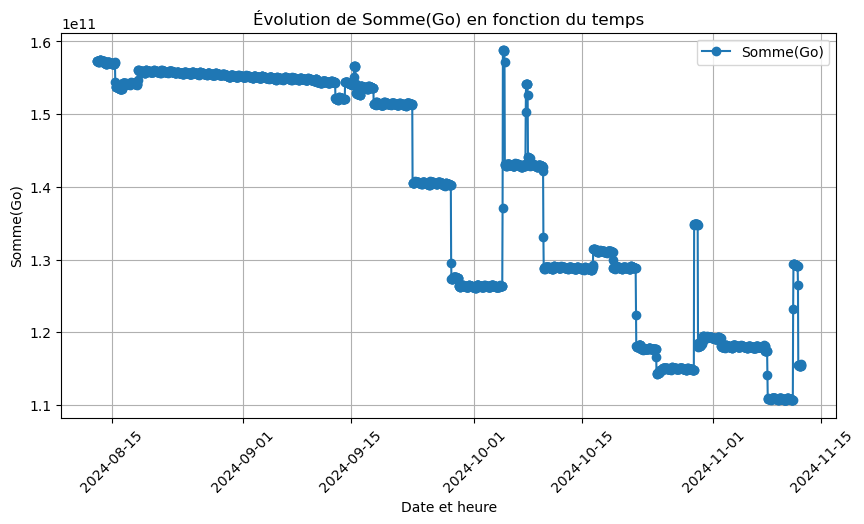

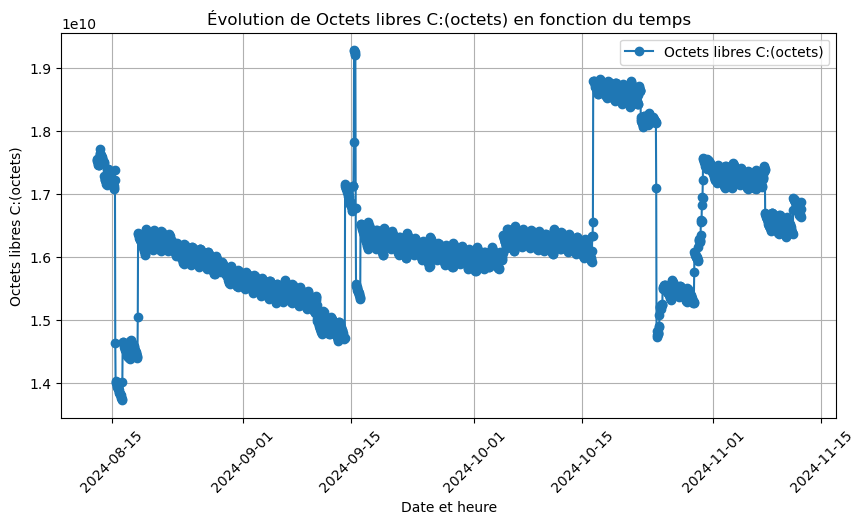

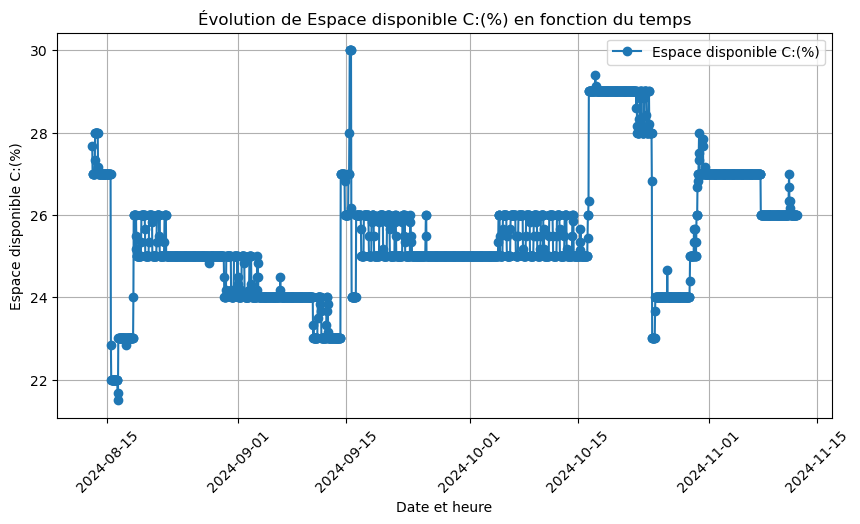

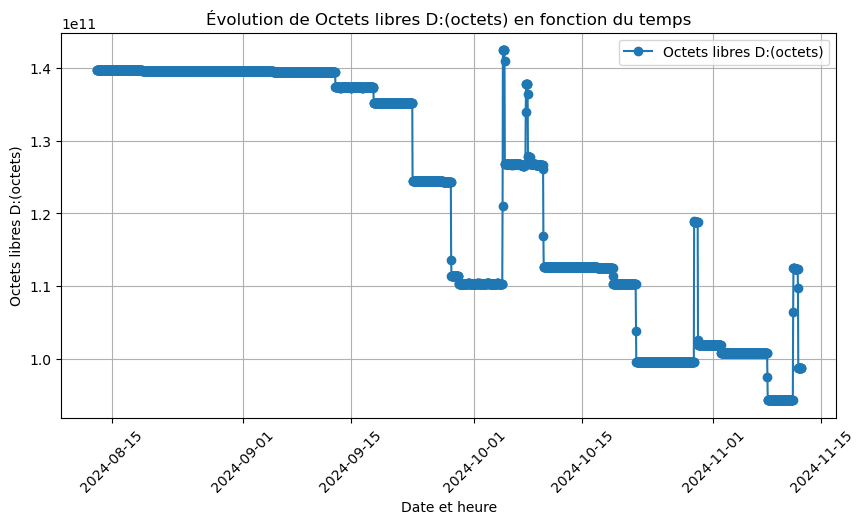

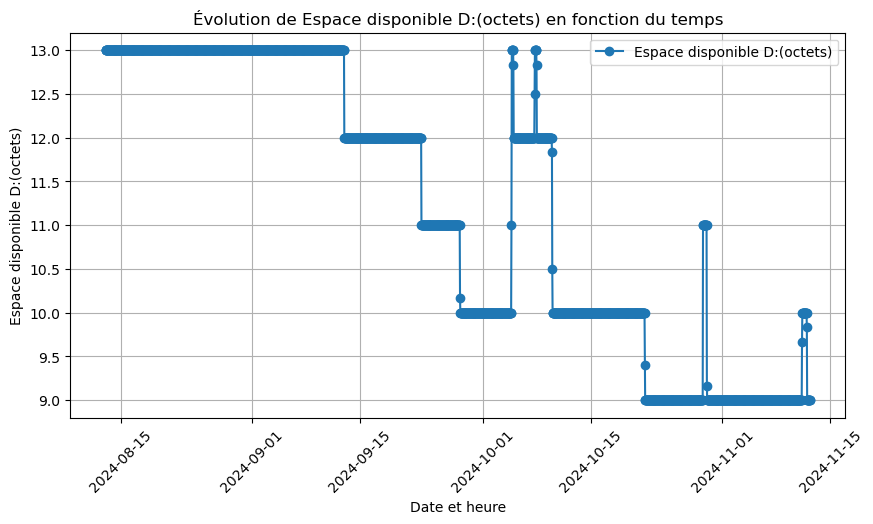

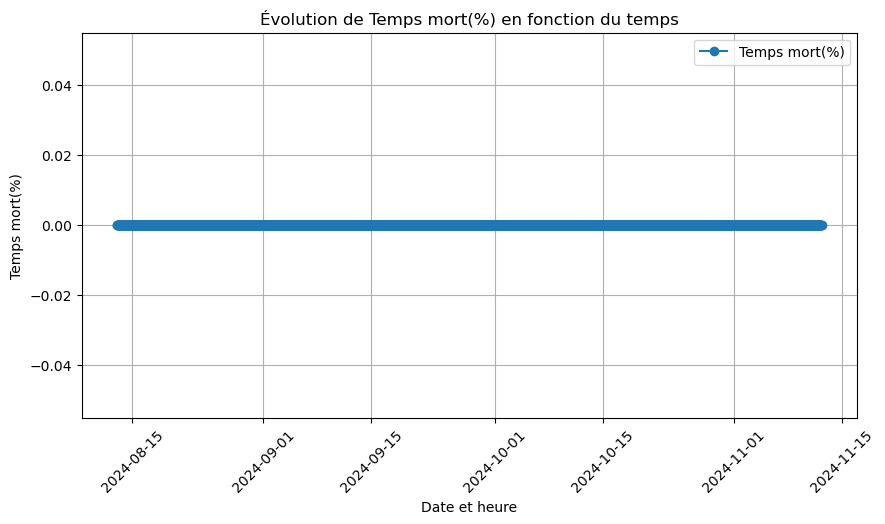

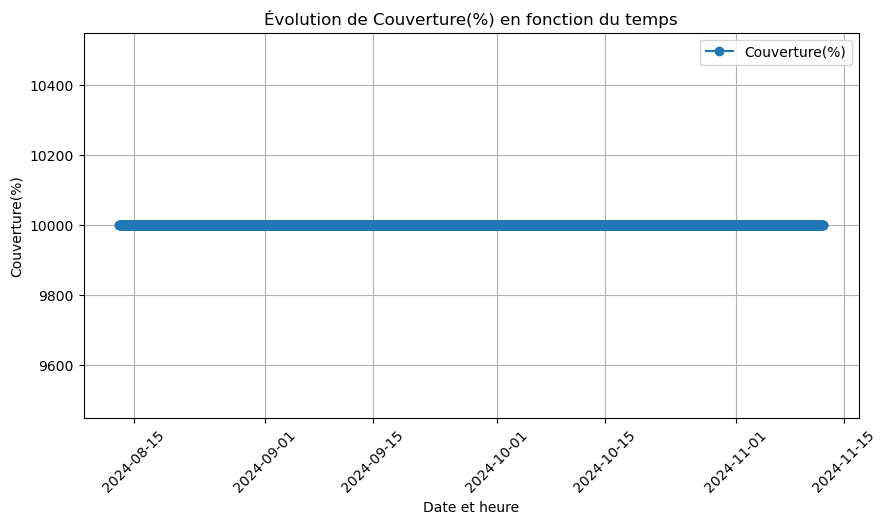

In [41]:
# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

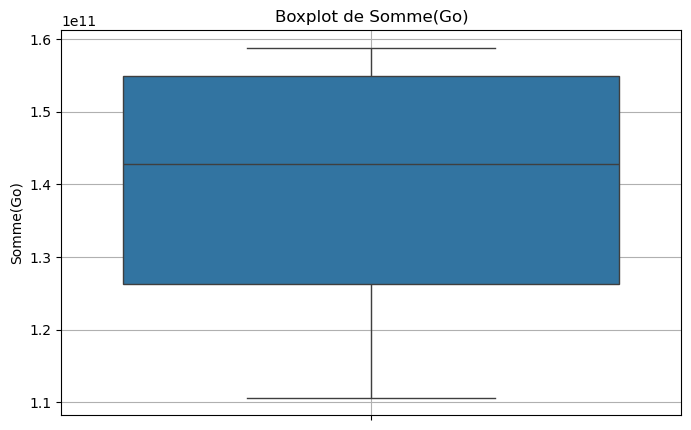

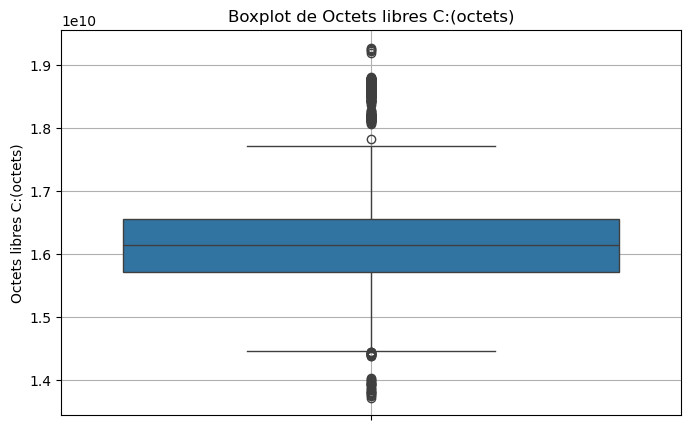

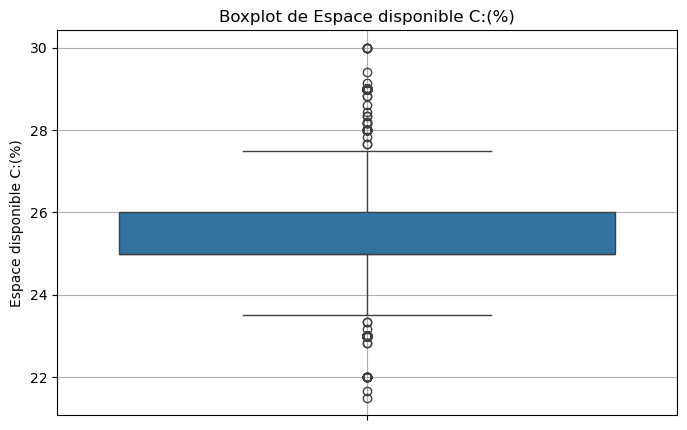

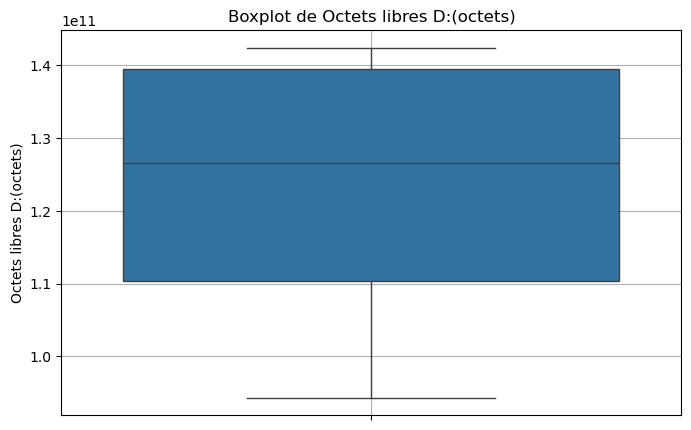

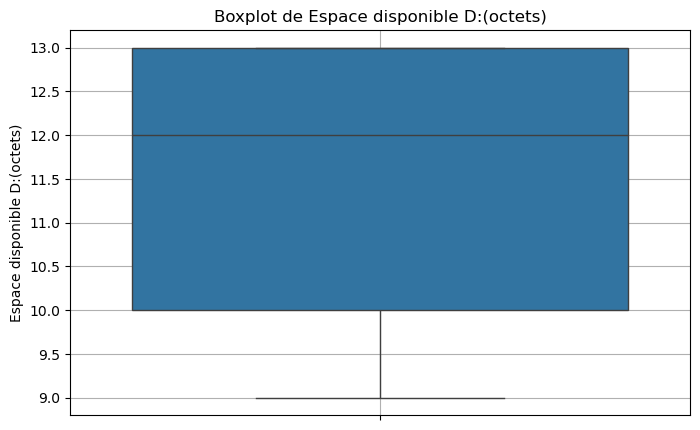

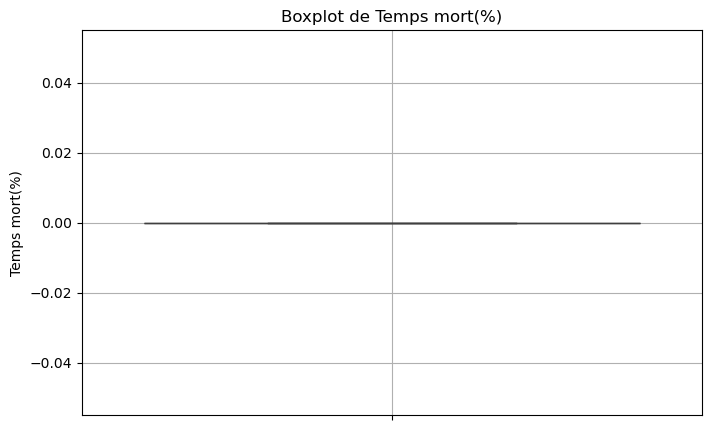

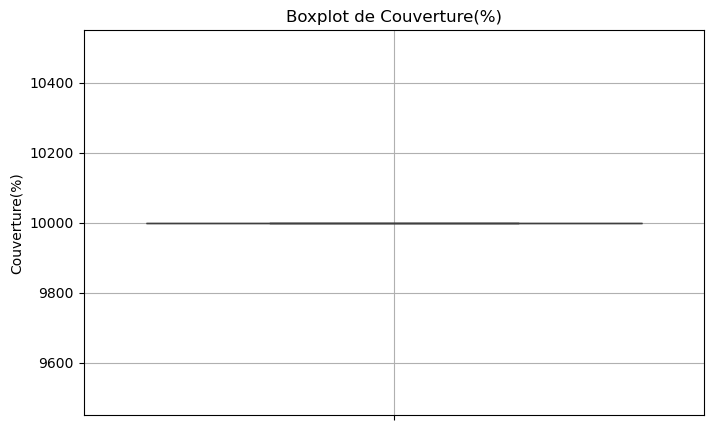

In [43]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

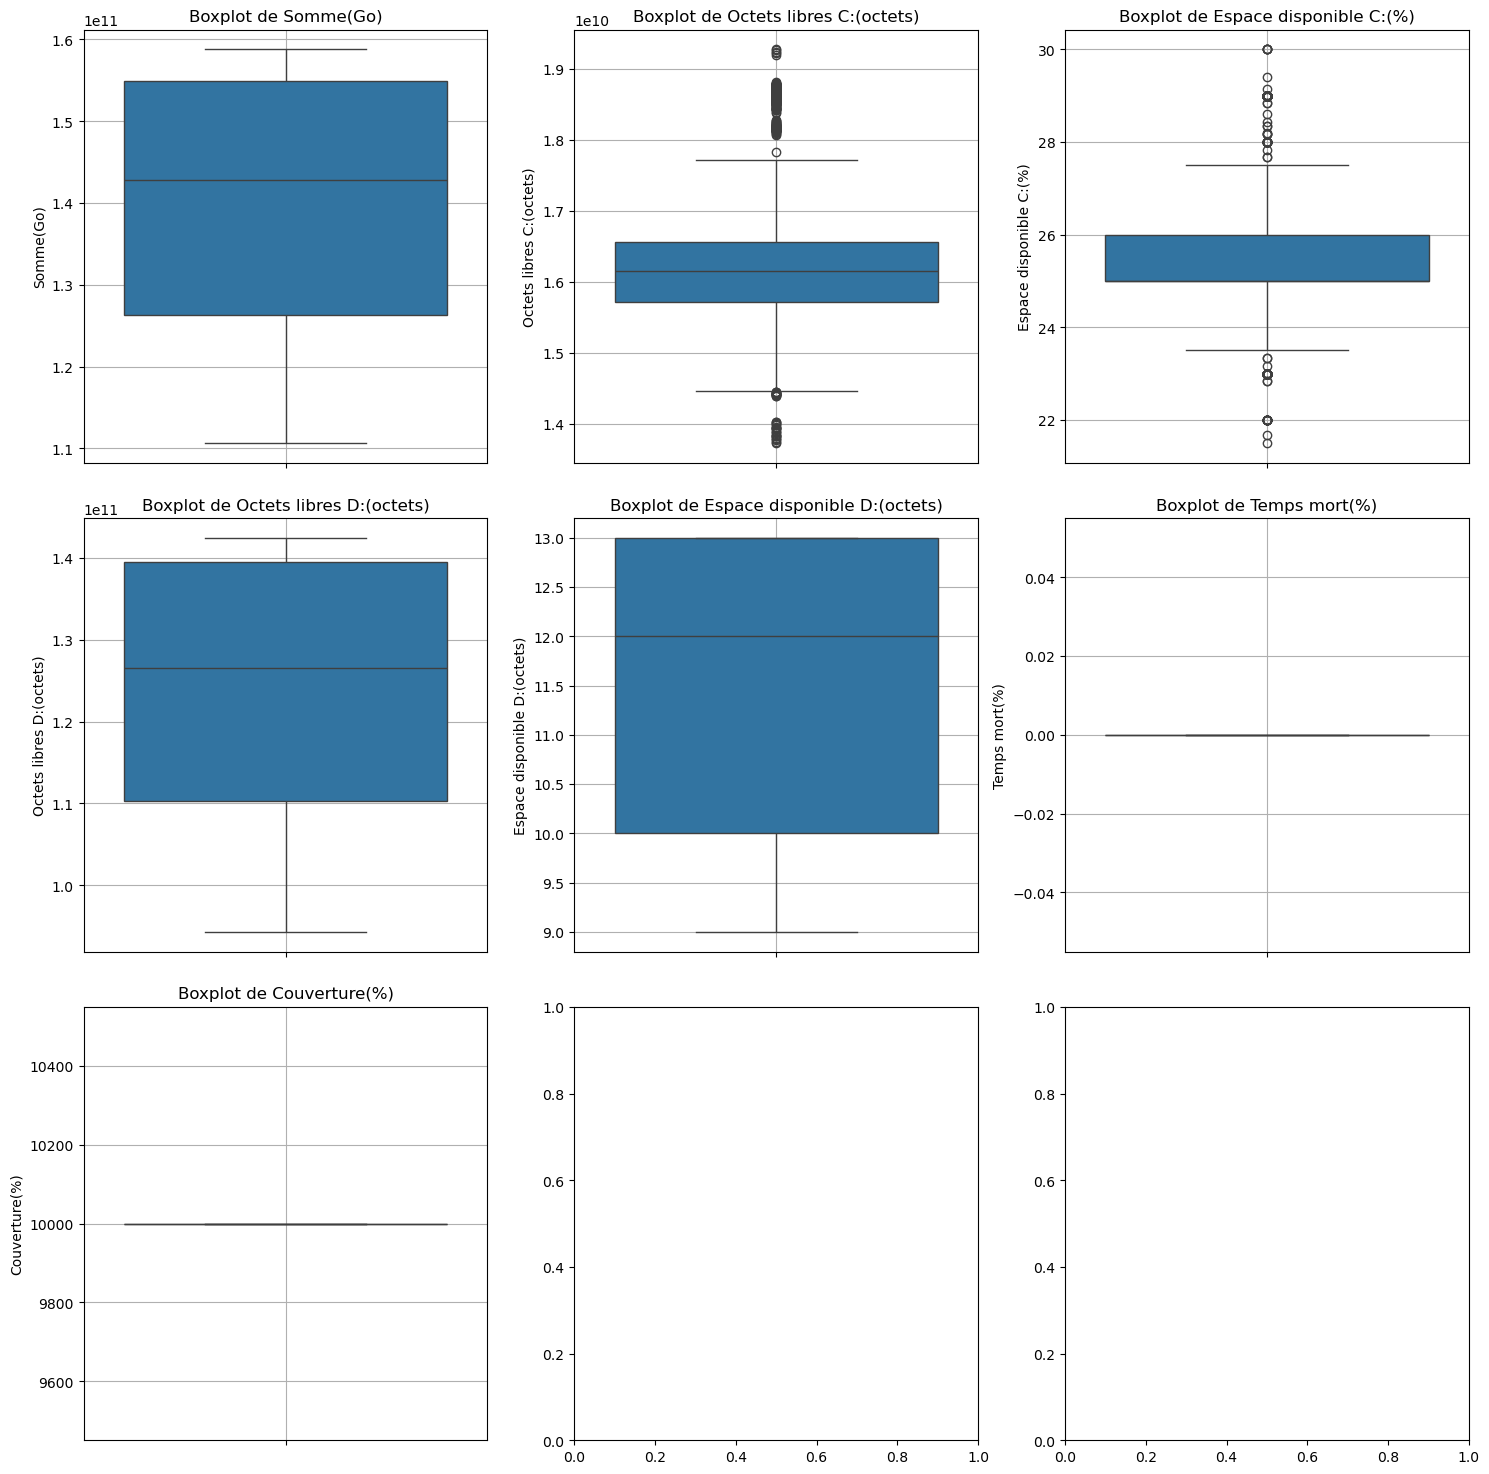

In [45]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### Enregistrement du nouveau dataframe dans un nouveau csv

In [50]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_espace_disque_filtered.csv", index=False, encoding='utf-8')